<font color='blue'><b>Новогодний комментарий ревьювера</b></font> \
<font color='green'>Привет! С наступившим Новым годом! \
У нас сейчас новогодние каникулы, но у меня было свободное время, и я решил проверить твою работу. \
Не могу обещать повторную проверку в течении 24 часов до конца каникул. \
11 января все ревьюеры начнут работать в  штатном режиме</font>

<font color='blue' size=5><b>Комментарий ревьювера</b></font>

<font color='blue'>Привет, Даниил! Меня зовут Григорий Звездин, и я буду проверять этот проект. Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>

<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>зеленый текст - все отлично</font>

<font color='orange'>оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>красный текст - есть недочеты</font>


---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='blue'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Оглавление:

1. [Загрузка и подготовка данных](#chapter1)<br>
2. [Анализ данных](#chapter2)<br>
3. [Обучение моделей](#chapter3)<br>
3.1 [Проверка на адекватность](#chapter3.1)<br>
3.2 [Обучение модели линейной регрессии](#chapter3.2)<br>
3.3 [Обучение модели дерева решний](#chapter3.3)<br>
3.4 [Обучение модели леса решений](#chapter3.4)<br>
4. [Выводы](#chapter4)<br>

# 1. Подготовка данных
<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_squared_error,
                             make_scorer
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [7]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


#### Исходя из данных сформируем задачи:

- Проверим праввильность расчета эффективности обогащения по целевому признаку rougher.output.recovery, формула recovery = (Cx(F-T))/(Fx(C-T))x100%, вычислим ее конкретно для df_train, где
<br>C — доля золота в концентрате после флотации/очистки(rougher.output.concentrate_au);
<br>F — доля золота в сырье/концентрате до флотации/очистки(rougher.input.feed_au);
<br>T — доля золота в отвальных хвостах после флотации/очистки(rougher.output.tail_au).
<br>Далее найдем MAE мае между расчетной recovery и значением признака, опишем выводы.
 

- Мы видим лишние признаки в df_train, которых нету в df_test(features_names = df_test.columns), соответственно лишние столбцы с признаками из df_train мы удалим, кроме целевых: target_names = ['rougher.output.recovery', 'final.output.recovery']


- Добавим в df_test два целевых признака из df_full(общая выборка), а именно rougher.output. recovery и final.output.recovery.


- Удалим пропуски во всех датафреймах с целевыми признаками, так как эти строки не информативны и оставшиеся данные заполним методом  fillna(method='ffill') и поменяем формат столбца 'date' c object на datetime.


<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Всё верно! 

Сначала посчитаем recovery, предварительно убрав пропуски из тренировочного датасета и сравним MAE, чтобы не получить бесконечности при отсутствии данных во время деления на ноль.

In [8]:
df_train.shape

(16860, 87)

In [9]:
df_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [10]:
df_train.shape

(14149, 87)

In [11]:
df_train['rougher.output.recovery.calculated'] = ((df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) /
         (df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100
        )



In [12]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery.calculated'])
mae.round(8)

0.0

In [13]:
df_train.drop('rougher.output.recovery.calculated', axis=1, inplace=True)

Значение MAE = 0, что говорит о правильности расчетов recovery и достоверности информации, удалили уже ненужный нам столбец с расчетами и теперь можем идти дальше.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Да, это так

Теперь уберем из df_train лишние признаки.

In [14]:
features_names = df_test.columns.tolist()
target_names = ['rougher.output.recovery', 'final.output.recovery']

In [15]:
df_train = df_train[features_names + target_names].copy()
df_train

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,73.755150
16856,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,69.049291
16857,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,67.002189
16858,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


Добавим в df_test два целевых признака из df_full(общая выборка), а именно rougher.output.recovery и final.output.recovery.

In [16]:
df_test['date']

0       2016-09-01 00:59:59
1       2016-09-01 01:59:59
2       2016-09-01 02:59:59
3       2016-09-01 03:59:59
4       2016-09-01 04:59:59
               ...         
5851    2017-12-31 19:59:59
5852    2017-12-31 20:59:59
5853    2017-12-31 21:59:59
5854    2017-12-31 22:59:59
5855    2017-12-31 23:59:59
Name: date, Length: 5856, dtype: object

In [17]:
df_full[['date']+ target_names]

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016
...,...,...,...
22711,2018-08-18 06:59:59,89.574376,73.755150
22712,2018-08-18 07:59:59,87.724007,69.049291
22713,2018-08-18 08:59:59,88.890579,67.002189
22714,2018-08-18 09:59:59,89.858126,65.523246


In [18]:
df_test = df_test.join(df_full[['date']+ target_names].set_index('date'), on='date').copy()

In [19]:
df_test[target_names]

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5851,95.172585,68.919891
5852,94.575036,68.440582
5853,93.018138,67.092759
5854,92.599042,68.061186


Мы добавили целевые признаки в df_test из df_full по ключу-колонке 'date', идем дальше.

Удалим пропуски во всех датафреймах с целевыми признаками, так как эти строки не информативны и оставшиеся данные заполним методом  fillna и поменяем формат столбца 'date' с object на datetime.

In [20]:
df_test[target_names].isna().mean()

rougher.output.recovery    0.093238
final.output.recovery      0.075478
dtype: float64

In [21]:
df_train[target_names].isna().mean()

rougher.output.recovery    0.0
final.output.recovery      0.0
dtype: float64

In [22]:
df_full[target_names].isna().mean()

rougher.output.recovery    0.137304
final.output.recovery      0.086415
dtype: float64

In [23]:
df_test.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace=True)
df_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace=True)
df_full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace=True)

df_test.fillna(method='ffill', inplace=True)
df_train.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

In [24]:
df_test[target_names].isna().mean()

rougher.output.recovery    0.0
final.output.recovery      0.0
dtype: float64

In [25]:
df_full[target_names].isna().mean()

rougher.output.recovery    0.0
final.output.recovery      0.0
dtype: float64


- Проблем с форматами мы не видим, единственное удалим пропуски во всех датафреймах с целевыми признаками, так как эти строки не информативны и оставшиеся данные заполним методом  fillna(method='ffill')

In [26]:
df_full['date'].head()

0    2016-01-15 00:00:00
1    2016-01-15 01:00:00
2    2016-01-15 02:00:00
3    2016-01-15 03:00:00
4    2016-01-15 04:00:00
Name: date, dtype: object

In [27]:
df_full['date'] = pd.to_datetime(df_full['date'],format='%Y-%m-%d %H:%M:%S')
df_train['date'] = pd.to_datetime(df_train['date'],format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'],format='%Y-%m-%d %H:%M:%S')

In [28]:
df_full['date'].head(5)

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
3   2016-01-15 03:00:00
4   2016-01-15 04:00:00
Name: date, dtype: datetime64[ns]

##  Вывод 
    Данные загружены, приведены к нужным форматам, предобработаны и дополнены необходимыми признаками, теперь можно их анализировать и более производительно работать.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Отлично, идем дальше

# 2. Анализ данных
<a class="anchor" id="chapter2"></a>

#### Сформируем задачи для анализа:
- Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Сделаем выводы.
- Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Отметим есть ли аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишем выводы и удалим аномалии.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Молодец

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Сделаем выводы.

Зададим сначала имена концентраций на каждый элемент по стадиям, сохраним их в листы

In [29]:
au_concentrate_stages = ['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag_concentrate_stages = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_concentrate_stages = ['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

Пропишем функцию для графика

In [30]:
def compare_stage_feature(df, stage0, stage1, stage2, stage3):
    df[stage0].plot.kde()
    df[stage1].plot.kde()
    df[stage2].plot.kde()
    df[stage3].plot.kde()
    plt.rcParams["figure.figsize"] = (15,10)
    plt.legend(['rougher_input', 'rougher_output', 'primary_cleaner_output', 'final_output'])
    plt.ylabel('Density')
    plt.xlabel('Value')
    plt.title('График распределения концентрации металла')

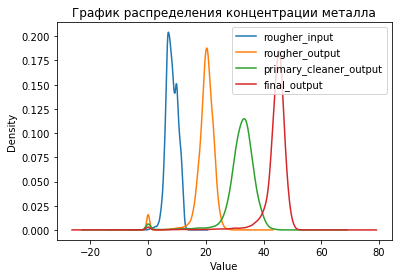

In [31]:
compare_stage_feature(df_full, au_concentrate_stages[0], au_concentrate_stages[1], au_concentrate_stages[2], au_concentrate_stages[3])

In [32]:
df_full[au_concentrate_stages[:]].describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


Мы видим конценатрация золота растет в среднем с 8 до 44. Самый результативный 1 этап - флотация, увеличивающий концентрацию золота в 2,5 раза, далее после первичной очистки концентрация вырастает в 1,6 раза, и после вторичной очистки еще в 1,4 раза.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Правильно

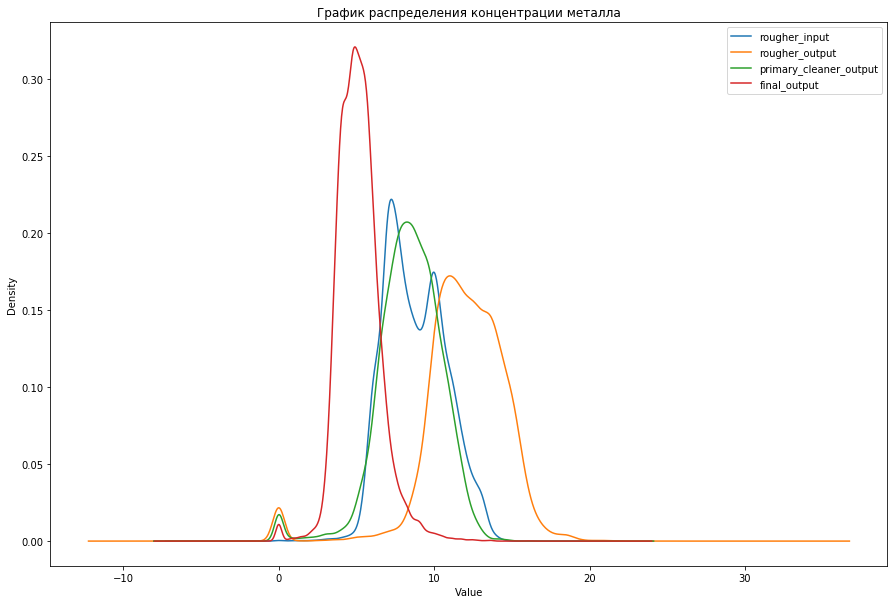

In [33]:
compare_stage_feature(df_full, ag_concentrate_stages[0], ag_concentrate_stages[1], ag_concentrate_stages[2], ag_concentrate_stages[3])

In [34]:
df_full[ag_concentrate_stages[:]].describe()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.794927,11.994759,8.442408,5.168387
std,1.936847,2.733862,2.054465,1.372362
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251000
50%,8.593574,12.098115,8.507298,5.066039
75%,10.213771,13.736996,9.809001,5.895401
max,14.596026,24.480271,16.081632,16.001945


Мы видим конценатрация серебра падает в среднем с 9 до 5. Самый результативный 2 этап вторичной очистки, концентрация падает на 40%. Так же есть рост концентрации серебра после флотации на 30%. Также мы видим аномальные концентрации от 0 до +1, которые совсем маловероятны и являються выбросами, возможно ложные данные попали сюда из-за технических проблем.

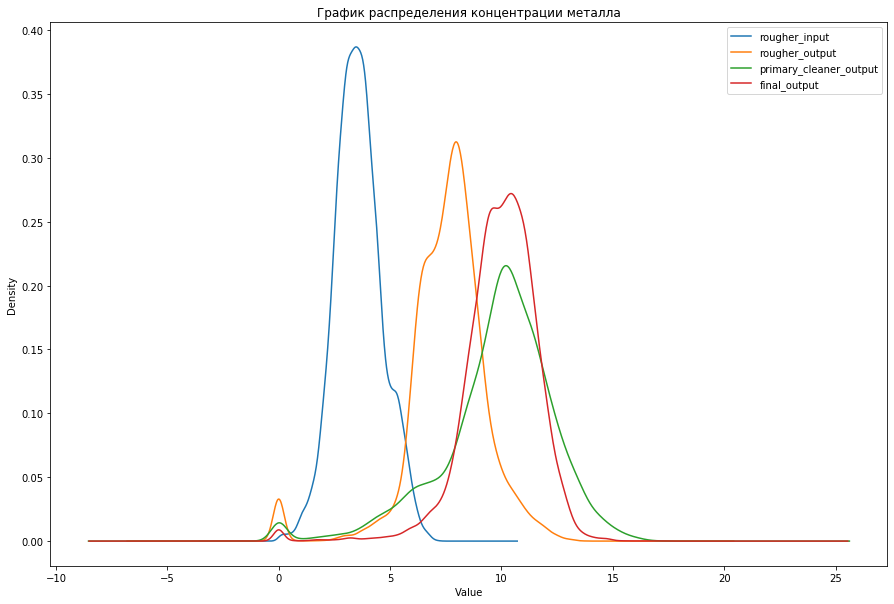

In [35]:
compare_stage_feature(df_full, pb_concentrate_stages[0], pb_concentrate_stages[1], pb_concentrate_stages[2], pb_concentrate_stages[3])

In [36]:
df_full[pb_concentrate_stages[:]].describe()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,3.585096,7.606272,9.810317,9.978821
std,1.062972,1.796757,2.572253,1.669228
min,0.010000,0.000000,0.000000,0.000000
25%,2.872178,6.725987,8.676500,9.137225
50%,3.528235,7.742580,10.142270,10.102264
75%,4.241005,8.565199,11.416298,11.035644
max,7.142594,13.617072,17.081278,17.031899


Концентрация свинца растет в 3 раза на всех этапах очистки с 3,5 до 10 в среднем. Самый большой рост концентрации на этапе флотации в 2 раза, далее после очистки концентрация свинца уже растет на 30% и на 2%.

#### Основной вывод по концентрации металлов: концентрация золота и свинца растут с этапами очистки в разы, а концентрация серебра падает. 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Пропишем функцию для сравнения изменения признаков на обучающей и тестовой выборке

In [37]:
def compare_train_test_feature(feature):
    df_train[feature].plot.kde()
    df_test[feature].plot.kde()
    plt.legend(['train', 'test'])
    plt.ylabel('Density')
    plt.xlabel('Size')
    plt.title('График распределения размеров гранул сырья на обучающей и тестовой выборках')

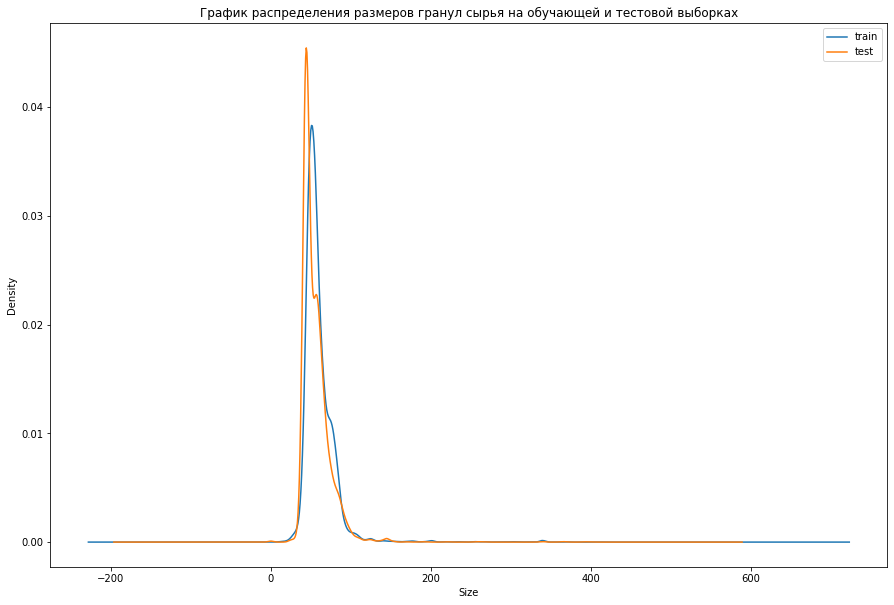

In [38]:
compare_train_test_feature('rougher.input.feed_size')

In [39]:
df_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [40]:
df_test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

#### Основной вывод по распределению размеров гранул: У оранжевой линии(test) есть пик, которого нет у синей(train), но распределения всё равно похожи. Они оба унимодальны, их средние и дисперсии очень близки друг к другу, cредние отличаються менее чем на 10%. Так что можно сказать, что распределения очень близки друг к другу, поэтому должно всё быть ок:)

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Да, значительной разницы между трейном и тестом нет, все действительно ок :)


 Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Отметим есть ли аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишем выводы и удалим аномалии.

Cначала зададим имена стадий списками, так будет проще

In [41]:
rougher_input = ['rougher.input.feed_au', 'rougher.input.feed_ag' ,'rougher.input.feed_pb']
rougher_output = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']
final_output = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

In [42]:
df1 = df_full[rougher_input[0]] + df_full[rougher_input[1]] + df_full[rougher_input[2]]
df2 = df_full[rougher_output[0]] + df_full[rougher_output[1]] + df_full[rougher_output[2]]
df3 = df_full[final_output[0]] + df_full[final_output[1]] + df_full[final_output[2]]
df3.sort_values()

5551      0.000000
14533     0.000000
8491      0.000000
8490      0.000000
8489      0.000000
           ...    
21527    64.588241
21523    64.689573
21528    64.856303
21524    64.938913
21522    64.968881
Length: 19439, dtype: float64

In [43]:
def compare_concentrate_stage(df1, df2, df3):
    df1.plot.kde()
    df2.plot.kde()
    df3.plot.kde()
    plt.legend(['rougher_input', 'rougher_output', 'final_output'])
    plt.ylabel('Density')
    plt.xlabel('Concentrate')
    plt.title('График распределения концентрации всех металлов на разных стадиях')

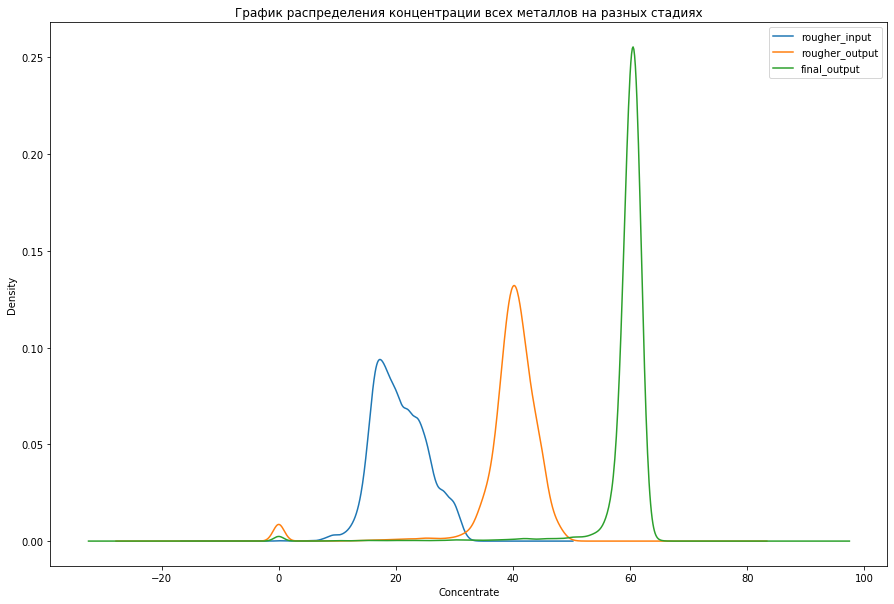

In [44]:
compare_concentrate_stage(df1, df2, df3)

In [45]:
print(df1.describe())
print()
print(df2.describe())
print()
print(df3.describe())

count    19439.000000
mean        20.646120
std          4.480027
min          0.030000
25%         17.252879
50%         20.141216
75%         23.797381
max         33.498784
dtype: float64

count    19439.000000
mean        39.373032
std          6.863389
min          0.000000
25%         38.394639
50%         40.312648
75%         42.365102
max         55.568687
dtype: float64

count    19439.000000
mean        59.223721
std          6.095138
min          0.000000
25%         59.298323
50%         60.306921
75%         61.096667
max         64.968881
dtype: float64


Мы видим что после флотации суммарно у нас концентрация металлов выросла в среднем в 2 раза,
после финальных стадий очистки концентрация мтеллов выросла еще на 50. Распределение становиться боллее концентрированное ближе к среднему после очистки. Так же мы видим выбросы с концентрацией до +1, которые желательно исключить из данных из статистики, тем более доля из совсем не велика < 3%.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Аномалии нам тут ни к чему, тем более они могут вызваны сбоями в измерительном оборудовании

Теперь последний шаг - удалим выбросы.

In [46]:
df_full[rougher_input].sort_values(by=rougher_input[0])

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
18893,0.010000,0.010000,0.010000
18894,0.010000,0.010000,0.010000
18892,0.010000,0.010000,0.010000
18895,0.010000,0.010000,0.010000
18891,0.010000,0.010000,0.010000
...,...,...,...
16163,13.406821,10.462107,6.748954
15739,13.417156,14.406130,5.675498
16164,13.458291,10.455295,6.764106
16165,13.524339,10.411169,6.834733


Пропишем функцию для удаления выбросов на каждой стадии очистки, и по всем типам металлов меньше единицы.

In [47]:
def clear_data(df):
    df = (df[(df['rougher.input.feed_au'] > 1) &
            (df['rougher.input.feed_ag'] > 1) & 
            (df['rougher.input.feed_pb'] > 1) &
            (df['rougher.output.concentrate_au'] > 1) & 
            (df['rougher.output.concentrate_ag'] > 1) & 
            (df['rougher.output.concentrate_pb'] > 1) & 
            (df['final.output.concentrate_au'] > 1) & 
            (df['final.output.concentrate_ag'] > 1) & 
            (df['final.output.concentrate_pb'] > 1)]
            .copy()
)
    return df

Отдельно пропишем функцию для очистки только трех типов признаков для тренировочной и тестовой выборки.

In [48]:
def clear_data_input_features(df):
    df = (df[(df['rougher.input.feed_au'] > 1) &
            (df['rougher.input.feed_ag'] > 1) & 
            (df['rougher.input.feed_pb'] > 1)]
            .copy()
)
    return df

Очищаем данные.

In [49]:
df_full = clear_data(df_full)
df_test = clear_data_input_features(df_test)
df_train = clear_data_input_features(df_train)

Сделаем проверку очистки данных по df_full, удачно ли сработал код

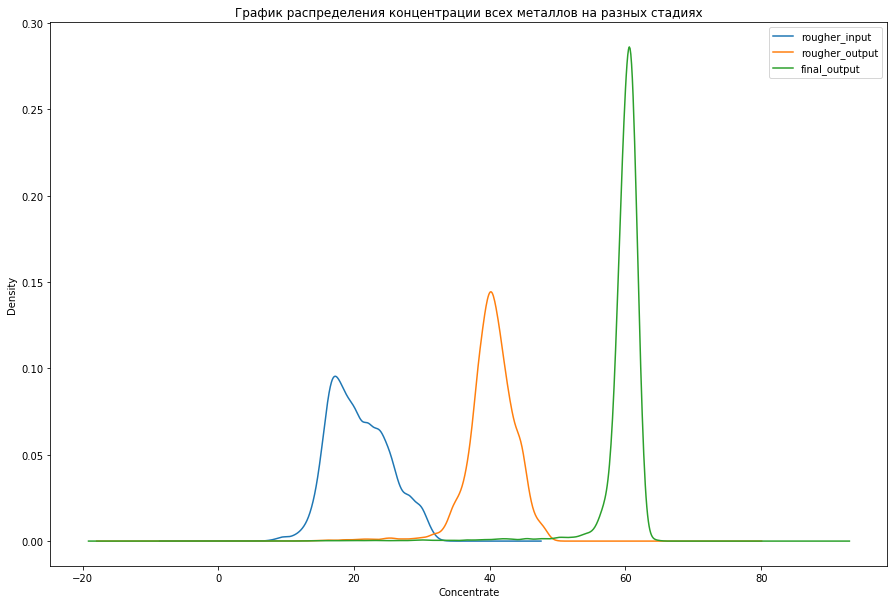

In [50]:
df1 = df_full[rougher_input[0]] + df_full[rougher_input[1]] + df_full[rougher_input[2]]
df2 = df_full[rougher_output[0]] + df_full[rougher_output[1]] + df_full[rougher_output[2]]
df3 = df_full[final_output[0]] + df_full[final_output[1]] + df_full[final_output[2]]
compare_concentrate_stage(df1, df2, df3)

Проверка пройдена успешно, выбросы удалены, отлично, задача выполнена.

## Вывод: 
    Мы проанализировали концентрации и подитожили, что концентрация золота и свинца растут с этапами очистки в разы, а концентрация серебра падает. Так же сравнили распределение размров гранул в тренировочной выборке и тестовой и поняли что, у тестовых данных(df_test) есть пик, которого нет у тренировочных данных(df_train), но распределения всё равно похожи. Они оба унимодальны, их средние и дисперсии очень близки друг к другу, cредние отличаються менее чем на 10%. Так что можно сказать, что распределения очень близки друг к другу и все должно быть ок. Провели анализ суммарной концентрации металлов на каждой стадии очистки и поняли, что после флотации суммарно у нас концентрация металлов выросла в среднем в 2 раза, после финальных стадий очистки концентрация мтеллов выросла еще на 50. Распределение становиться боллее концентрированное ближе к среднему после каждго этапа очистки. Так же мы убрали из данных выбросы с концентрацией до +1, которые возможно возникли из-за технических проблем с оборудованием.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Отлично! Переходим к моделям

# 3. Обучение Моделей
<a class="anchor" id="chapter3"></a>

#### Сформируем наши задачи:
- Напишем функцию для вычисления итоговой sMAPE.
- Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверем её на тестовой выборке. 
- Напишем выводы.

Напишем функцию SMAPE (Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение») которая будет критерием качества у нашей задачи с нашими целевыми переменными: 'rougher.output.recovery', 'final.output.recovery'.

In [51]:
def smape(y, y_pred):
    res = abs(y - y_pred) / ((abs(y) + abs(y_pred)) * 0.5)
    return res.sum() / len(res) * 100
 
def smape_final(smape_1, smape_2):
    return smape_1 * 0.25 + smape_2 * 0.75

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Совет: Можно было упростить, посчитав среднее встроенной функцией

Далее поделим наши данные на features и targets и сделаем нормализацию числовых данных

In [52]:
target_rougher = df_train['rougher.output.recovery'].copy()
target_final = df_train['final.output.recovery'].copy()
features = df_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1).copy()

numeric = features.columns
scaler = StandardScaler()
scaler.fit(features[numeric]) 
features[numeric] = scaler.transform(features[numeric])

In [53]:
target_rougher_test = df_test['rougher.output.recovery'].copy()
target_final_test = df_test['final.output.recovery'].copy()
features_test = df_test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1).copy()

numeric_test = features_test.columns
scaler_test = StandardScaler()
scaler_test.fit(features_test[numeric_test]) 
features_test[numeric] = scaler_test.transform(features_test[numeric_test])

### Проверка на адекватность
<a class="anchor" id="chapter3.1"></a>

Теперь сделаем проверку на адекватность, задав арифметические средние значения в таргете и найдем значения smape1 если мы брали случаенную сренюю цифру по статистике

In [54]:
target_pred_constant_r = pd.Series(target_rougher.mean(), index=target_rougher.index)
target_pred_constant_f = pd.Series(target_final.mean(), index=target_final.index)

smape1 = smape(target_rougher, target_pred_constant_r)
smape2 = smape(target_final, target_pred_constant_f)

smape_f = smape_final(smape1, smape2)

print('Адекватный sMAPE для rough:',smape1)
print('Адекватный sMAPE для final:',smape2)
print('Адекватный final sMAPE:', smape_f)

Адекватный sMAPE для rough: 11.752581061884783
Адекватный sMAPE для final: 10.964837340217413
Адекватный final sMAPE: 11.161773270634255


<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Молодец, что проверяешь константной моделью

### Модель линейной регрессии
<a class="anchor" id="chapter3.2"></a>

Далее обучим модель линейной регрессии с крос валидацией в которую зададим нашу функцию smape с аргумментом greater_is_better=False (нам нужна минимизация и этом параметр в подборе добавит минус в итоге мы получим самое минимальное отклонение, дефолтно он подбирает максимальное, по этому надо минусовые значения назат вернуть в "+" помножив на "-1" в конце кода), так же у нас будет 5 частей во время крос валидации.

In [55]:
model_rougher = LinearRegression()
score_rougher = cross_val_score(model_rougher, features, target_rougher, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
final_score_rougher = score_rougher.mean()
display(score_rougher)
display(final_score_rougher)

model_final = LinearRegression()
score_final = cross_val_score(model_final, features, target_final, cv = 5, scoring = make_scorer(smape, greater_is_better=False))*(-1) 
final_score_final = score_final.mean()
display(score_final)
display(final_score_final)

best_smape_final_linear = round(smape_final(final_score_rougher, final_score_final),2)
    
print('final sMAPE on LinearRegression =', best_smape_final_linear)

array([14.91984891,  7.73803811, 17.85140031, 14.38466239,  8.95529336])

12.769848616490894

array([13.71629364, 10.36392794, 11.07127826, 10.38224658, 14.36054129])

11.978857542711541

final sMAPE on LinearRegression = 12.18


 #### Модель линейной регрессии не проходит тест на адекватность 12,18 > 11,16 ее лучше не использовать вообще.

### Модель дерева решений
<a class="anchor" id="chapter3.3"></a>

Теперь аналогично обучим модели с деревом решением и перебором гиперпараметра - глубина дерева(2-20) и кросс валидацией.

In [56]:
%%time

#обучаем модель для грубой обработки
best_final_score_rougher = 9999999
best_depth_rougher = 0
best_model_rougher = None

for depth in range(2, 20):
    tree = DecisionTreeRegressor(random_state=42, max_depth=depth)
    tree.fit(features, target_rougher)
    score_rougher = cross_val_score(tree, features, target_rougher, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_rougher = score_rougher.mean()
    if best_final_score_rougher > final_score_rougher:
        best_final_score_rougher = final_score_rougher
        best_depth_rougher = depth
        best_model_rougher = tree

print('smape score rougher:', best_final_score_rougher)
print('depth tree model rougher:', best_depth_rougher)
print('tree model rougher:', best_model_rougher)

smape score rougher: 11.545219882333514
depth tree model rougher: 4
tree model rougher: DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
CPU times: user 1min 7s, sys: 0 ns, total: 1min 7s
Wall time: 1min 8s


In [57]:
%%time

#обучаем модель для финальной обработки        
best_final_score_final = 9999999
best_depth_final = 0
best_model_final = None
        
for depth in range(2, 20):
    tree = DecisionTreeRegressor(random_state=42, max_depth=depth)
    tree.fit(features, target_final)
    score_final = cross_val_score(tree, features, target_final, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_final = score_final.mean()
    if best_final_score_final > final_score_final:
        best_final_score_final = final_score_final
        best_depth_final = depth
        best_model_final = tree

print('smape score final:', best_final_score_final)
print('depth tree model final:', best_depth_final)
print('tree model final:', best_model_final)

smape score final: 10.320446576388397
depth tree model final: 2
tree model final: DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
CPU times: user 1min 7s, sys: 0 ns, total: 1min 7s
Wall time: 1min 7s


In [58]:
# Считаем итоговый smape и выводим результаты по моделям
best_smape_final_tree = round(smape_final(best_final_score_rougher, best_final_score_final),2)        
print('final sMAPE on DecisionTreeRegressor =', best_smape_final_tree)

final sMAPE on DecisionTreeRegressor = 10.63


#### Модель дерева решений проходит проверку на адекватность sMAPE 10.63 < 11.16 и дает результат лучше чем линейная регрессия. 

### Модель леса решений
<a class="anchor" id="chapter3.4"></a>

Обучим модели леса решений с перебором гиперпараметров и кросс валидацией, сначала будем перебирать глубину при 20 деревьях(среднее количество), потом с найденной глубиной переберем количество деревьев. Сначала найдем гиперпараметры и подберем модель для грубой обработки с лучшим smape.

In [59]:
%%time

best_final_score_rougher_forest = 9999999
best_model_rougher_forest = None
best_depth_rougher_forest = 0


for depth in range (1, 21): # внутри цикла еще один цикл перебирающий глубину деревьев от 1 до 20
    model = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=depth) 
        # создаем пустую модель с заданным количеством деревьев
    model.fit(features, target_rougher)
        # считаем модель на тренировочной выборке
    score_rougher = cross_val_score(model, features, target_rougher, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_rougher = score_rougher.mean()
    print(final_score_rougher)
        # считаем sMAPE модели на валидационной выборке
    if best_final_score_rougher_forest > final_score_rougher:
        best_final_score_rougher_forest = final_score_rougher   
            #сохраняем наилучший sMAPE
        best_model_rougher_forest = model
            # сохраняем наилучшую модель
        best_depth_rougher_forest = depth
            # сохраняем наилучшее значение с глубиной деревьев

print('sMAPE score rougher:', best_final_score_rougher_forest)
print('depth tree model rougher:', best_depth_rougher_forest)
print('forest of trees of model rougher:', best_model_rougher_forest)

12.390279936919024
12.320115851116325
11.362697840040088
11.153168555122091
11.063547557163506
11.019833210757495
11.223561577406276
11.724706271661553
12.144100847182534
12.81706585242058
12.910060140792964
13.030529324661066
13.246426989164183
13.348297266799026
13.089878522722174
13.828334406879359
13.857733735400208
13.579038563778656
13.977879676182486
14.361139278058133
sMAPE score rougher: 11.019833210757495
depth tree model rougher: 6
forest of trees of model rougher: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)
CPU times: user 14min 47s, sys: 0 ns, total: 14min 47s
Wal

In [60]:
%%time

best_final_score_rougher_forest = 9999999
best_model_rougher_forest = None
best_est_rougher_forest = 0

for est in range(10, 51, 5): # создаем цикл перебирая с 10 по 50 деревьев в лесу с шагом 5
    model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=best_depth_rougher_forest) 
        # создаем пустую модель с заданным количеством деревьев
    model.fit(features, target_rougher)
        # считаем модель на тренировочной выборке
    score_rougher = cross_val_score(model, features, target_rougher, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_rougher = score_rougher.mean()
    print(final_score_rougher)
        # считаем sMAPE модели на валидационной выборке
    if best_final_score_rougher_forest > final_score_rougher:
        best_final_score_rougher_forest = final_score_rougher   
            #сохраняем наилучший sMAPE
        best_model_rougher_forest = model
            # сохраняем наилучшую модель
        best_est_rougher_forest = est
            # сохраняем наилучшее значение с количеством деревьев

print('sMAPE score rougher:', best_final_score_rougher_forest)
print("count of trees in forest:", best_est_rougher_forest)
print('depth tree model rougher:', best_depth_rougher_forest)
print('forest of trees of model rougher:', best_model_rougher_forest)

10.958915279329329
11.043800418876156
11.019833210757495
10.986742545629522
10.991470235602455
10.938909300844632
10.97624747410774
10.95436482663807
10.962826876781865
sMAPE score rougher: 10.938909300844632
count of trees in forest: 35
depth tree model rougher: 6
forest of trees of model rougher: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=35,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)
CPU times: user 6min 34s, sys: 58.4 ms, total: 6min 34s
Wall time: 6min 42s


Теперь аналогично переберем гиперпараметры и обучим модель для финальной обработки с лучшим smape.

In [61]:
%%time

best_final_score_final_forest = 9999999
best_model_final_forest = None
best_depth_final_forest = 0


for depth in range (1, 21): # внутри цикла еще один цикл перебирающий глубину деревьев от 1 до 20
    model = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=depth) 
        # создаем пустую модель с заданным количеством деревьев
    model.fit(features, target_final)
        # считаем модель на тренировочной выборке
    score_final = cross_val_score(model, features, target_final, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_final = score_final.mean()
    print(final_score_final)
        # считаем sMAPE модели на валидационной выборке
    if best_final_score_final_forest > final_score_final:
        best_final_score_final_forest = final_score_final   
            #сохраняем наилучший sMAPE
        best_model_final_forest = model
            # сохраняем наилучшую модель
        best_depth_final_forest = depth
            # сохраняем наилучшее значение с глубиной деревьев

print('sMAPE score final:', best_final_score_final_forest)
print('depth tree model final:', best_depth_final_forest)
print('forest of trees of model final:', best_model_final_forest)

10.672585095857382
10.078715324302257
10.094873800180071
10.121064675059136
10.265536159565437
10.697637946580123
10.689508981444456
11.004587498990276
11.459936873153115
11.2429115263922
11.388144647608106
11.435363238317537
11.614197684423392
11.897996034727004
11.81863217180241
11.5982749002176
11.820174243409628
11.938968917550657
11.9203861707345
12.077310562762435
sMAPE score final: 10.078715324302257
depth tree model final: 2
forest of trees of model final: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)
CPU times: user 14min 36s, sys: 171 ms, total: 14min 37s
Wall time: 14

In [62]:
%%time

best_final_score_final_forest = 9999999
best_model_final_forest = None
best_est_final_forest = 0

for est in range(10, 51, 5): # создаем цикл перебирая с 10 по 50 деревьев в лесу с шагом 5
    model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=best_depth_final_forest) 
        # создаем пустую модель с заданным количеством деревьев
    model.fit(features, target_final)
        # считаем модель на тренировочной выборке
    score_final = cross_val_score(model, features, target_final, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
    final_score_final = score_final.mean()
    print(final_score_final)
        # считаем sMAPE модели на валидационной выборке
    if best_final_score_final_forest > final_score_final:
        best_final_score_final_forest = final_score_final   
            #сохраняем наилучший sMAPE
        best_model_final_forest = model
            # сохраняем наилучшую модель
        best_est_final_forest = est
            # сохраняем наилучшее значение с количеством деревьев

print('sMAPE score final:', best_final_score_final_forest)
print("count of trees in forest:", best_est_final_forest)
print('depth tree model final:', best_depth_final_forest)
print('forest of trees of model final:', best_model_final_forest)

10.193815347696908
10.142517561274712
10.078715324302257
10.08847441789995
10.08744234844238
10.065027782785965
10.056338796318412
10.066333183624398
10.074258024191819
sMAPE score final: 10.056338796318412
count of trees in forest: 40
depth tree model final: 2
forest of trees of model final: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)
CPU times: user 2min 23s, sys: 23.8 ms, total: 2min 23s
Wall time: 2min 25s


Теперь считаем итоговый sMAPE

In [63]:
# Считаем итоговый smape и выводим результаты по моделям
best_smape_final_forest = round(smape_final(best_final_score_rougher_forest, best_final_score_final_forest),2)        
print('final sMAPE on DecisionTreeRegressor =', best_smape_final_forest)

final sMAPE on DecisionTreeRegressor = 10.28


Теперь выведем итоговые sMAPE по 3 моделям и выберем лучший.

In [64]:
print('Best sMAPE of LineareRegression:', best_smape_final_linear)
print('Best sMAPE of DecisionTreeRegressor:', best_smape_final_tree)
print('Best sMAPE of RandomForestRegressor:', best_smape_final_forest)

Best sMAPE of LineareRegression: 12.18
Best sMAPE of DecisionTreeRegressor: 10.63
Best sMAPE of RandomForestRegressor: 10.28


#### Наилучший sMAPE=10,28 мы получили на 2 моделях леса деревьев, для грубой обработки глубина=6 и количество деревьев=35, для финальной обработки глубина=2 и количество деревьев=40. Данные модели проходят тест на адекватность со sMAPE=11,16

# Вывод 
<a class="anchor" id="chapter4"></a>

Теперь посчитаем sMAPE для тестовых признаков и сделаем финальные выводы

In [65]:
%%time

score_rougher = cross_val_score(best_model_rougher_forest, features_test, target_rougher_test, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
score_rougher_test = score_rougher.mean()
print(score_rougher_test)

score_final = cross_val_score(best_model_final_forest, features_test, target_final_test, cv = 5, scoring = make_scorer(smape,  greater_is_better=False))*(-1)
score_final_test = score_final.mean()
print(score_final_test)

# Считаем итоговый sMAPE и выводим результаты по моделям
best_smape_final_forest_test = round(smape_final(score_rougher_test, score_final_test),2)        
print('final sMAPE of test data on DecisionTreeRegressor =', best_smape_final_forest_test)

12.560365909399389
9.064601766381447
final sMAPE of test data on DecisionTreeRegressor = 9.94
CPU times: user 20.3 s, sys: 3.97 ms, total: 20.3 s
Wall time: 21 s


## Вывод: 
    Мы предобработали и подготовили данные, сделали исследовательский анализ. Так же мы подобрали наилучшую модель - модель леса деревьев решений, которая дает sMAPE=10,28 ниже планки теста на адекватность 11,16, и лучше как линейной регрессии 12,18 так и модели дерева решения 10,63. На тестовых данных sMAPE нашей наилучшей модели получилась 9,94 и прошла планку теста на адекватность 11,16. 

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Замечательно!

<font color='blue'><b>Комментарий ревьювера</b></font>\
<font color='green'>Даниил, отличная работа! \
Очень понравилось внимание к планам и выводам, все подробно описано. \
    Код чистый, используешь функции. \
    Графики наглядные, к ним имеются пояснения. \
    Правильно использована кросс-валидация с кастомной метрикой.</font>


<font color='blue'><b>Поздравляю, проект принят!</b></font>

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке